<a href="https://colab.research.google.com/github/rubbybbs/ProbML-book-solution/blob/main/ch13/13.7.4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 13.7.4


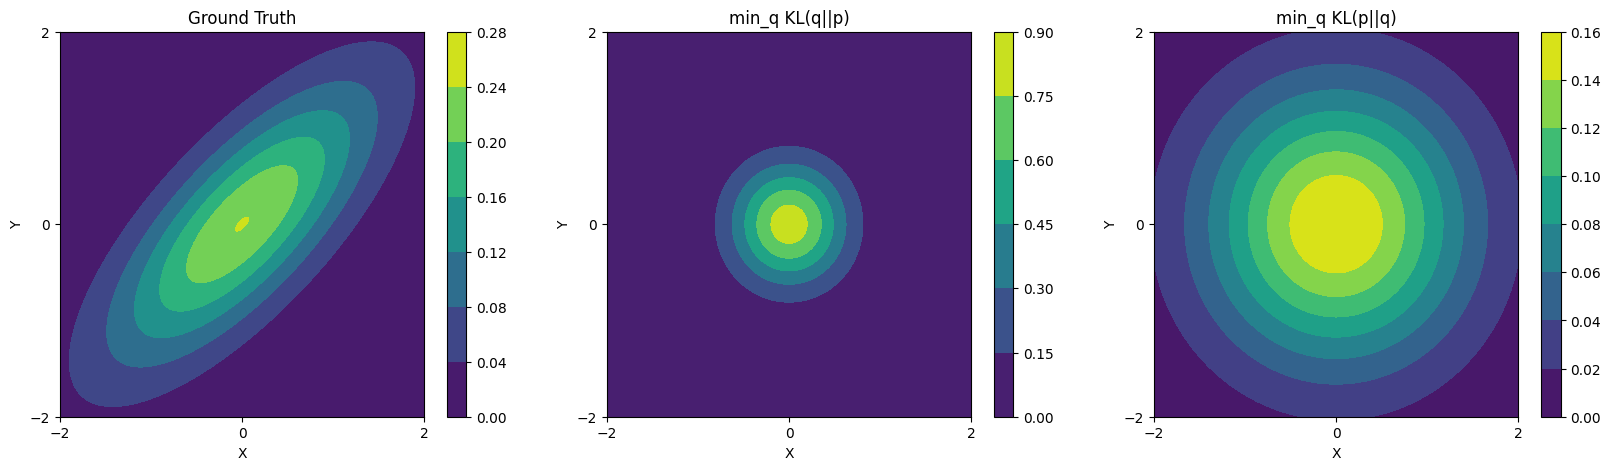

<Figure size 640x480 with 0 Axes>

In [44]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal, norm

# 定义均值向量和协方差矩阵
mu = np.array([0, 0])
Sigma = np.array([[1, 0.75], [0.75, 1]])

# 创建一个网格
x = np.linspace(-2, 2, 1000)
y = np.linspace(-2, 2, 1000)
X, Y = np.meshgrid(x, y)

# 将网格坐标点组合
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

# Ground Truth
rv_truth = multivariate_normal(mu, Sigma)
Z_truth = rv_truth.pdf(pos)

# min_q KL(q||p)
sigma_1 = sigma_2 = 1 - 0.75 ** 2
Z_qp = norm.pdf(X, 0, sigma_1) * norm.pdf(Y, 0, sigma_2)

# min_q KL(p||q)
sigma_1 = sigma_2 = 1
Z_pq = norm.pdf(X, 0, sigma_1) * norm.pdf(Y, 0, sigma_2)

# 绘制Ground Truth的等高线图
plt.figure(figsize=(20, 5))

plt.subplot(131)
plt.xticks([-2, 0, 2])
plt.yticks([-2, 0, 2])
plt.contourf(X, Y, Z_truth, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title('Ground Truth')

# 绘制min_q KL(q||p)的等高线图
plt.subplot(132)
plt.xticks([-2, 0, 2])
plt.yticks([-2, 0, 2])
plt.contourf(X, Y, Z_qp, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title('min_q KL(q||p)')

# 绘制min_q KL(p||q)的等高线图
plt.subplot(133)
plt.xticks([-2, 0, 2])
plt.yticks([-2, 0, 2])
plt.contourf(X, Y, Z_pq, cmap='viridis')
plt.xlabel('X')
plt.ylabel('Y')
plt.colorbar()
plt.title('min_q KL(p||q)')

plt.show()
plt.savefig('./13.7.4.pdf')